# **Supply Chain Performance & Freight Cost Analysis**

Data source: https://www.kaggle.com/datasets/apoorvwatsky/supply-chain-shipment-pricing-data

Reporter: Trinh Nguyen

# Executive Summary
This project analyzes supply chain performance and freight cost trends using the **SCMS Delivery History Dataset**.
Key insights:

*  **Air freight dominates** shipments (>60%) and costs, showing strong reliance on speed but at a premium.

*   **Air freight dominates** shipments (>60%) and costs, showing strong reliance on speed but at a premium.
*   **Trucking is cost-efficient**, carrying ~30% of orders while contributing only 22% of costs.
*   **Air Charter is expensive**, handling just 6.5% of shipments but 13% of costs, mostly for urgent cases.
*   **On-time delivery varies by region and vendor**, with several areas showing frequent delays.
*   **Freight cost per kilogram differs significantly by shipment mode and region**, pointing to optimization opportunities.

These findings highlight the trade-offs between speed, cost, and reliability in logistics operations.

# 1. Data Preparation

In [12]:
import pandas as pd
from google.colab import drive

drive.mount('/content/ggdrive')

df_raw = pd.read_csv("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/SCMS_Delivery_History_Dataset_20150929.csv", encoding="latin1")

# df_raw.head()

Drive already mounted at /content/ggdrive; to attempt to forcibly remount, call drive.mount("/content/ggdrive", force_remount=True).


In [13]:
# Xử lý tên cột:
print(list(df_raw.columns))

df_raw.columns = (df_raw.columns.str.strip().str.replace(" ", "_").str.replace("/", "_").str.lower())

df = df_raw.copy()
df_clean = df_raw.copy()
# df.head()

['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']


In [14]:
# Thư viện cần thiết:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

pd.set_option('display.max_columns', 200)

In [15]:
date_cols = ['pq_first_sent_to_client_date', 'po_sent_to_vendor_date', 'scheduled_delivery_date', 'delivered_to_client_date', 'delivery_recorded_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df[date_cols].head(10)

/tmp/ipython-input-3284267825.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-3284267825.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-3284267825.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-3284267825.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and

,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date
0,NaT,NaT,2006-06-02,2006-06-02,2006-06-02
1,NaT,NaT,2006-11-14,2006-11-14,2006-11-14
2,NaT,NaT,2006-08-27,2006-08-27,2006-08-27
3,NaT,NaT,2006-09-01,2006-09-01,2006-09-01
4,NaT,NaT,2006-08-11,2006-08-11,2006-08-11
5,NaT,NaT,2006-09-28,2006-09-28,2006-09-28
6,NaT,NaT,2007-01-08,2007-01-08,2007-01-08
7,NaT,NaT,2006-11-24,2006-11-24,2006-11-24
8,NaT,NaT,2006-12-07,2006-12-07,2006-12-07
9,NaT,2006-11-13,2007-01-30,2007-01-30,2007-01-30


In [16]:
# Xử lý các cột số
num_cols = df.select_dtypes(include=['number']).columns
print(num_cols)

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.describe(include=[np.number])

Index(['id', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price',
       'line_item_insurance_(usd)'],
      dtype='object')


,id,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,line_item_insurance_(usd)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [ ]:
#df[num_cols].head(20)

In [17]:
# Xử lý cột weight_(kilograms) và freight_cost_(usd)
df_clean = df_raw.copy()

cols_to_process = ['weight_(kilograms)', 'freight_cost_(usd)']
notes = {'weight_(kilograms)': ['Weight Captured Separately'],
          'freight_cost_(usd)': ['Freight Included in Commodity Cost', 'Invoiced Separately']}

for col in cols_to_process:
    df_clean[col + '_ref_id'] = (df_clean[col].astype(str).str.extract(r'ID#:(\d+)')[0].astype('Int64'))

    df_clean[col + '_note'] = np.where(df_clean[col].isin(notes[col]), df_clean[col], pd.NA)

    df_clean[col + '_num'] = pd.to_numeric(df_clean[col], errors='coerce')

    ref_df = df_clean[['id', col + '_num']].rename(columns={'id': col + '_ref_id', col + '_num': col + '_from_ref'})
    ref_df[col + '_ref_id'] = ref_df[col + '_ref_id'].astype('Int64')

    df_clean = df_clean.merge(ref_df, on=col + '_ref_id', how='left')
    df_clean[col + '_value'] = df_clean[col + '_num'].combine_first(df_clean[col + '_from_ref'])
    df_clean.drop(columns=[col + '_from_ref'], inplace=True)

df = df.merge(df_clean[['weight_(kilograms)_value', 'freight_cost_(usd)_value']],left_index=True, right_index=True, how='left')
#df[cols_to_process].head(10)

In [18]:
# Các cột ngày cần phân tích
date_cols = ['po_sent_to_vendor_date', 'scheduled_delivery_date', 'delivered_to_client_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Tính chỉ số thời gian
df['lead_time_days'] = (df['delivered_to_client_date'] - df['po_sent_to_vendor_date']).dt.days
df['schedule_delay_days'] = (df['delivered_to_client_date'] - df['scheduled_delivery_date']).dt.days
df['on_time'] = df['schedule_delay_days'] <= 0

# Chỉ số freight/kg (tránh chia cho 0)
df['freight_per_kg'] = df['freight_cost_(usd)_value'] / df['weight_(kilograms)_value'].replace(0, np.nan)

# Tháng/năm giao hàng
df['delivered_month'] = df['delivered_to_client_date'].dt.to_period('M').astype(str)
df['delivered_year'] = df['delivered_to_client_date'].dt.year

In [19]:
print(df[date_cols].head(10))
print(df[['lead_time_days', 'schedule_delay_days', 'on_time', 'freight_per_kg']].head(10))
print(df[['delivered_month', 'delivered_year']].head(10))

  po_sent_to_vendor_date scheduled_delivery_date delivered_to_client_date
0                    NaT              2006-06-02               2006-06-02
1                    NaT              2006-11-14               2006-11-14
2                    NaT              2006-08-27               2006-08-27
3                    NaT              2006-09-01               2006-09-01
4                    NaT              2006-08-11               2006-08-11
5                    NaT              2006-09-28               2006-09-28
6                    NaT              2007-01-08               2007-01-08
7                    NaT              2006-11-24               2006-11-24
8                    NaT              2006-12-07               2006-12-07
9             2006-11-13              2007-01-30               2007-01-30
   lead_time_days  schedule_delay_days  on_time  freight_per_kg
0             NaN                    0     True       60.026154
1             NaN                    0     True       12.6

In [20]:
# Format date columns
date_cols = ['pq_first_sent_to_client_date', 'po_sent_to_vendor_date', 'scheduled_delivery_date', 'delivered_to_client_date', 'delivery_recorded_date']

for col in date_cols:
    if col in df.columns and pd.api.types.is_datetime64_any_dtype(df[col]):
        df[col] = df[col].dt.strftime('%d/%m/%y')

df[['po_sent_to_vendor_date','delivered_to_client_date', 'lead_time_days','schedule_delay_days','on_time', 'freight_cost_(usd)_value','weight_(kilograms)_value','freight_per_kg']].head(10)


,po_sent_to_vendor_date,delivered_to_client_date,lead_time_days,schedule_delay_days,on_time,freight_cost_(usd)_value,weight_(kilograms)_value,freight_per_kg
0,NaN,02/06/06,NaN,0,True,780.34,13.0,60.026154
1,NaN,14/11/06,NaN,0,True,4521.50,358.0,12.629888
2,NaN,27/08/06,NaN,0,True,1653.78,171.0,9.671228
3,NaN,01/09/06,NaN,0,True,16007.06,1855.0,8.629143
4,NaN,11/08/06,NaN,0,True,45450.08,7590.0,5.988153
5,NaN,28/09/06,NaN,0,True,5920.42,504.0,11.746865
6,NaN,08/01/07,NaN,0,True,NaN,328.0,NaN
7,NaN,24/11/06,NaN,0,True,6212.41,1478.0,4.203254
8,NaN,07/12/06,NaN,0,True,4861.14,479.0,10.148518
9,13/11/06,30/01/07,78.0,0,True,NaN,643.0,NaN


In [21]:
# Missing value
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.head(20)

# Kiểm tra phân bố lead time và freight_per_kg
print('Lead time - count, mean, median:', df['lead_time_days'].count(), df['lead_time_days'].mean(), df['lead_time_days'].median())
print("Freight per kg - count, mean, median:", df['freight_per_kg'].count(), df['freight_per_kg'].mean(), df['freight_per_kg'].median())

# Kiểm tra outlier
df.sort_values('freight_per_kg', ascending=False).head(10)

Lead time - count, mean, median: 4592 105.55858013937282 92.0
Freight per kg - count, mean, median: 8492 31.16399852152978 6.3246406109613655


,id,project_code,pq_#,po___so_#,asn_dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd),weight_(kilograms)_value,freight_cost_(usd)_value,lead_time_days,schedule_delay_days,on_time,freight_per_kg,delivered_month,delivered_year
9881,86277,151-NG-T30,FPQ-4537,SO-35031,DN-1683,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,06/11/09,NaN,19/04/10,31/03/10,31/03/10,ARV,Adult,SCMS from RDC,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,64,156.16,2.44,0.04,"Aurobindo Unit III, India",Yes,4,124350.82,0.34,4.0,124350.82,NaN,-19,True,31087.705,2010-03,2010
8801,84931,151-NG-T30,FPQ-13293,SO-47300,DN-3720,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,19/11/13,NaN,30/06/14,09/05/14,23/05/14,ARV,Pediatric,SCMS from RDC,"Efavirenz 200mg, scored tablets, 90 Tabs",Efavirenz,Generic,200mg,Tablet,90,10534,97966.20,9.30,0.10,"Strides, Bangalore, India.",Yes,2,45180.62,100.71,2.0,45180.62,NaN,-52,True,22590.310,2014-05,2014
1423,11079,151-NG-T30,Pre-PQ Process,SO-35330,DN-1615,Nigeria,PMO - US,From RDC,N/A - From RDC,Air,NaN,NaN,19/02/10,22/01/10,22/01/10,ARV,Adult,SCMS from RDC,Emtricitabine/Tenofovir Disoproxil Fumarate 20...,Emtricitabine/Tenofovir Disoproxil Fumarate,Generic,200/300mg,Tablet - FDC,30,5,58.75,11.75,0.39,Mylan (formerly Matrix) Nashik,Yes,1,19480.97,0.13,1.0,19480.97,NaN,-28,True,19480.970,2010-01,2010
1048,10576,104-CI-T01,Pre-PQ Process,SO-781,DN-245,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,NaN,NaN,NaN,31/07/07,31/07/07,31/07/07,HRDT,HIV test,SCMS from RDC,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,2,160.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,1,9789.07,0.26,1.0,9789.07,NaN,0,True,9789.070,2007-07,2007
259,2502,102-KE-T01,Pre-PQ Process,SCMS-42970,ASN-4098,Kenya,PMO - US,Direct Drop,EXW,Air,NaN,04/04/09,18/06/09,18/06/09,18/06/09,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,NaN,Test kit,20,5,160.00,32.00,1.60,"Trinity Biotech, Plc",Yes,2,12561.4,0.31,2.0,12561.40,75.0,0,True,6280.700,2009-06,2009
10125,86529,114-UG-T30,FPQ-10556,SO-43200,DN-2922,Uganda,PMO - US,From RDC,N/A - From RDC,Truck,30/08/12,NaN,06/12/12,20/11/12,20/11/12,ARV,Adult,SCMS from RDC,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,Generic,300mg,Tablet,60,25,169.00,6.76,0.11,Hetero Unit III Hyderabad IN,Yes,1,5220.79,0.24,1.0,5220.79,NaN,-16,True,5220.790,2012-11,2012
5393,61882,161-ZA-T30,FPQ-5303,SCMS-68950,ASN-7130,South Africa,PMO - US,Direct Drop,DDP,Air,18/03/10,19/03/10,11/06/10,11/06/10,11/06/10,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,2,5.06,2.53,0.04,"Aurobindo Unit III, India",Yes,1,4116.81,0.01,1.0,4116.81,84.0,0,True,4116.810,2010-06,2010
8617,84724,107-RW-T30,FPQ-9911,SO-42090,DN-2670,Rwanda,PMO - US,From RDC,N/A - From RDC,Air,11/05/12,NaN,08/06/12,01/06/12,01/06/12,ARV,Pediatric,SCMS from RDC,"Abacavir 20mg/ml, oral solution, Bottle, 240 ml",Abacavir,Generic,20mg/ml,Oral solution,240,1004,8534.00,8.50,0.04,"Cipla, Goa, India",Yes,1,3253.88,11.96,1.0,3253.88,NaN,-7,True,3253.880,2012-06,2012
5592,65120,105-GY-T30,FPQ-12235,SCMS-190770,ASN-20330,Guyana,PMO - US,Direct Drop,EXW,Air,06/05/13,04/06/13,29/07/13,29/07/13,29/07/13,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,655,65500.00,100.00,1.00,"Alere Medical Co., Ltd.",Yes,2,5110.28,81.02,2.0,5110.28,55.0,0,True,2555.140,201

In [22]:
# Loại bỏ outlier bằng IQR
Q1 = df['freight_per_kg'].quantile(0.25)
Q3 = df['freight_per_kg'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outlier = df[(df['freight_per_kg'] >= lower_bound) & (df['freight_per_kg'] <= upper_bound)]

print('Số lượng trước khi lọc:', df['freight_per_kg'].count())
print('Số lượng sau khi lọc:', df_no_outlier['freight_per_kg'].count())

Số lượng trước khi lọc: 8492
Số lượng sau khi lọc: 7712


# 2. Data Analysis

## 2.1 Shipment Mode Analysis

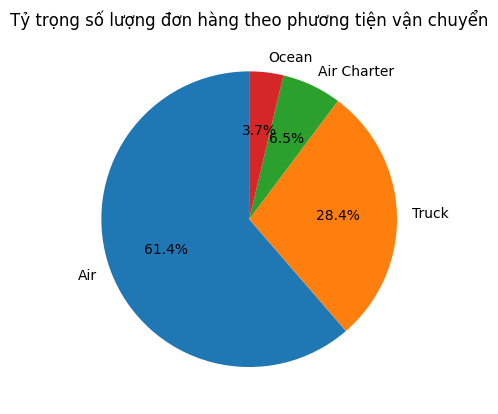

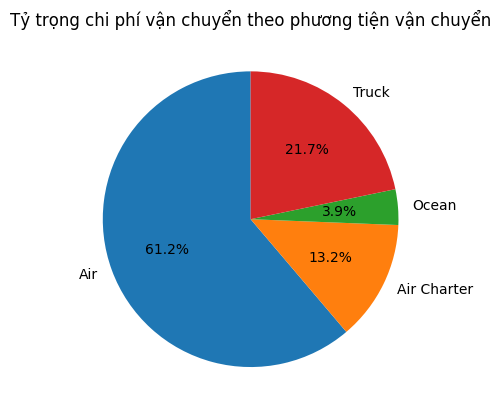

In [47]:
# Tỷ trọng số lượng đơn hàng theo phương tiện vận chuyển
order_counts = df['shipment_mode'].value_counts()

#plt.figure(figsize=(6,6))
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ trọng số lượng đơn hàng theo phương tiện vận chuyển')
plt.savefig("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/Images/Shipment_Mode_Analysis_by_Number_of_Order.png", dpi=300, bbox_inches="tight")
plt.show()

# Tỷ trọng chi phí vận chuyển theo công ty vận chuyển
freight_costs = df.groupby('shipment_mode')['freight_cost_(usd)_value'].sum()

#plt.figure(figsize=(6,6))
plt.pie(freight_costs, labels=freight_costs.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ trọng chi phí vận chuyển theo phương tiện vận chuyển')

plt.savefig("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/Images/Shipment_Mode_Analysis_by_Cost.png", dpi=300, bbox_inches="tight")
plt.show()


**Shipment volume by transportation mode**

Air accounts for over 60% of shipments, underlining its role as the primary mode.

Trucking follows with ~28%, essential for domestic and last-mile delivery.

Ocean freight remains limited at 3.7%, typically used for bulk or oversized cargo.

**Freight cost share by transportation mode**

Air also leads in cost (>60%), consistent with its volume share and high unit price.

Trucking, with nearly 30% of orders, makes up only 21.7% of costs, proving its cost efficiency.

Air Charter drives 13% of costs with just 6.5% of shipments, showing its premium use in urgent situations.

Ocean freight costs remain small (~4%), in line with its limited usage.

## 2.2 Lead Time Analysis

/tmp/ipython-input-1274739341.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='country', y='lead_time_days', estimator='mean', ci=None, order=df.groupby('country')['lead_time_days'].mean().sort_values().index)


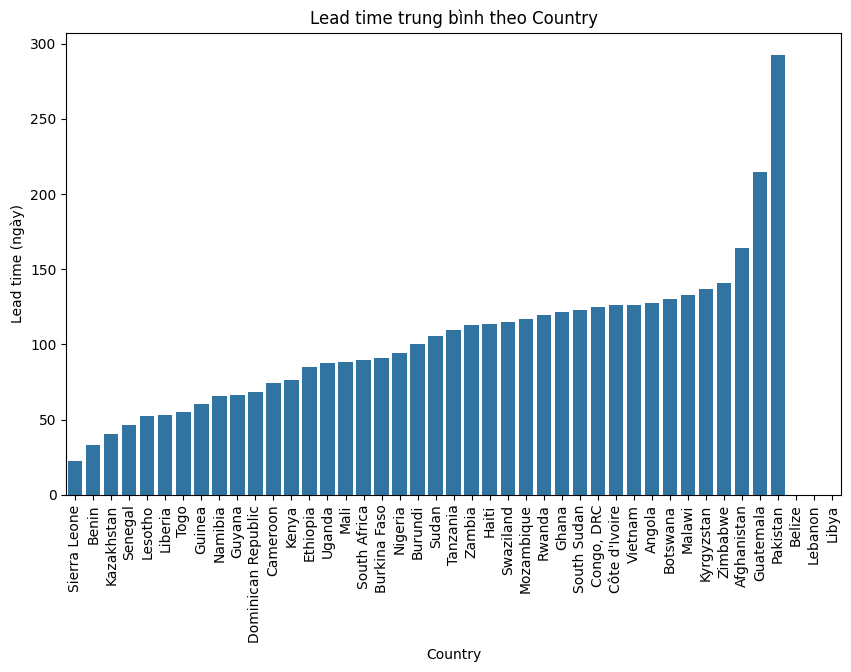

/tmp/ipython-input-1274739341.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['vendor'].isin(top_vendors)], x='vendor', y='lead_time_days', estimator='mean', ci=None)


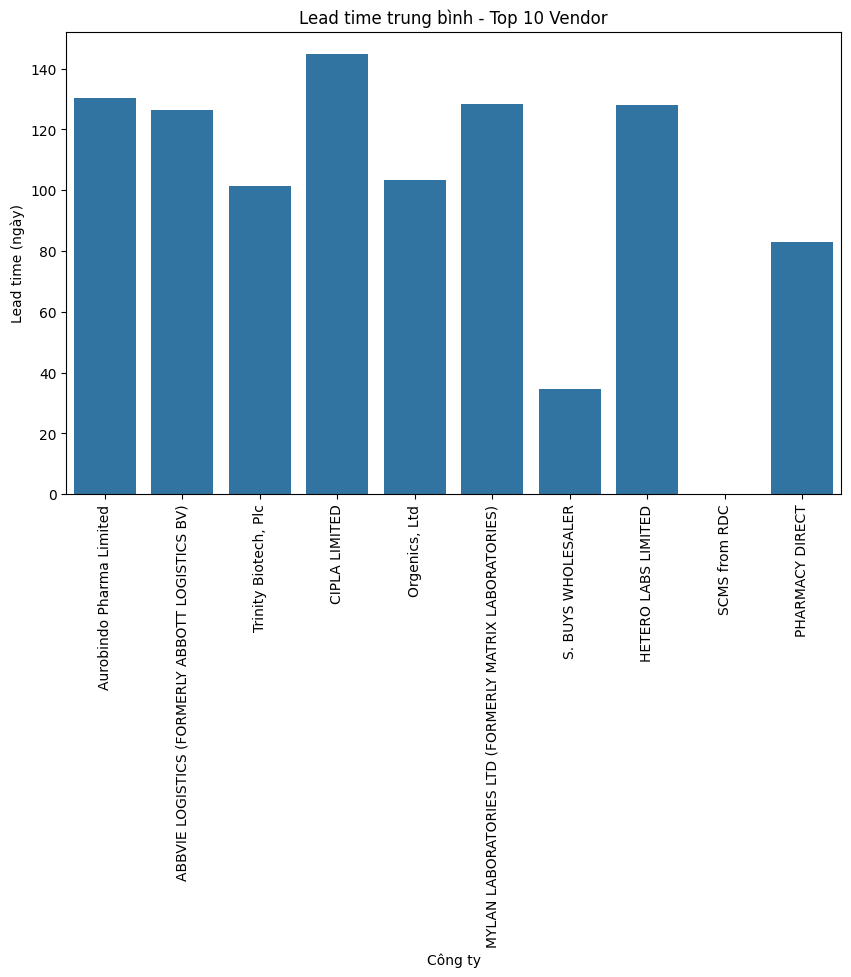

/tmp/ipython-input-1274739341.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='shipment_mode', y='lead_time_days', estimator='mean', ci=None)


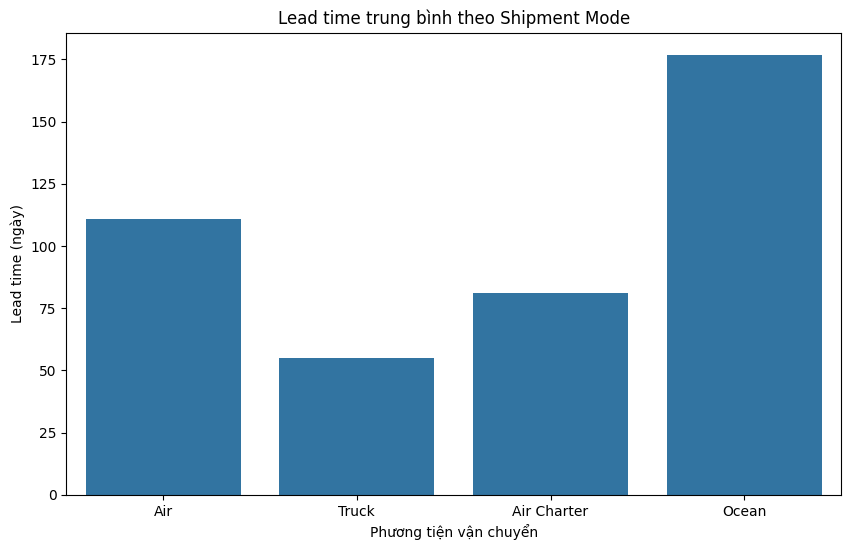

In [48]:
# Lead time trung bình theo Country
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='country', y='lead_time_days', estimator='mean', ci=None, order=df.groupby('country')['lead_time_days'].mean().sort_values().index)
plt.xticks(rotation=90)
plt.title('Lead time trung bình theo Country')
plt.ylabel('Lead time (ngày)')
plt.xlabel('Country')
plt.savefig("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/Images/Lead_Time_Analysis_by_Country.png", dpi=300, bbox_inches="tight")
plt.show()

# Lead time trung bình theo Vendor (Top 10 vendor nhiều đơn nhất)
top_vendors = df['vendor'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.barplot(data=df[df['vendor'].isin(top_vendors)], x='vendor', y='lead_time_days', estimator='mean', ci=None)
plt.xticks(rotation=90)
plt.title('Lead time trung bình - Top 10 Vendor')
plt.ylabel('Lead time (ngày)')
plt.xlabel('Công ty')
plt.savefig("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/Images/Lead_Time_Analysis_by_Vendor.png", dpi=300, bbox_inches="tight")
plt.show()

# Lead time trung bình theo Shipment Mode
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='shipment_mode', y='lead_time_days', estimator='mean', ci=None)
plt.title('Lead time trung bình theo Shipment Mode')
plt.ylabel('Lead time (ngày)')
plt.xlabel('Phương tiện vận chuyển')


plt.savefig("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/Images/Lead_Time_Analysis_by_Shipmode.png", dpi=300, bbox_inches="tight")
plt.show()


**By country**

Lead times vary widely. Sierra Leone, Benin, and Kazakhstan average under 50 days, while Pakistan and Guatemala reach 200–300 days.

Differences likely reflect infrastructure quality, customs processes, and distance.

**By top 10 vendors**

Vendors differ significantly. S. Buys Wholesaler averages ~35 days, while CIPLA Limited exceeds 140 days.

Others, such as Pharmacy Direct and Orgenics Ltd, cluster between 85–100 days.

**By shipment mode**

Ocean: ~175 days, the slowest.

Air: ~110 days.

Air Charter: ~80 days, faster than air but still moderate.

Truck: ~55 days, the quickest, ideal for short-distance or domestic routes.

## 2.3 On-time Delivery Analysis

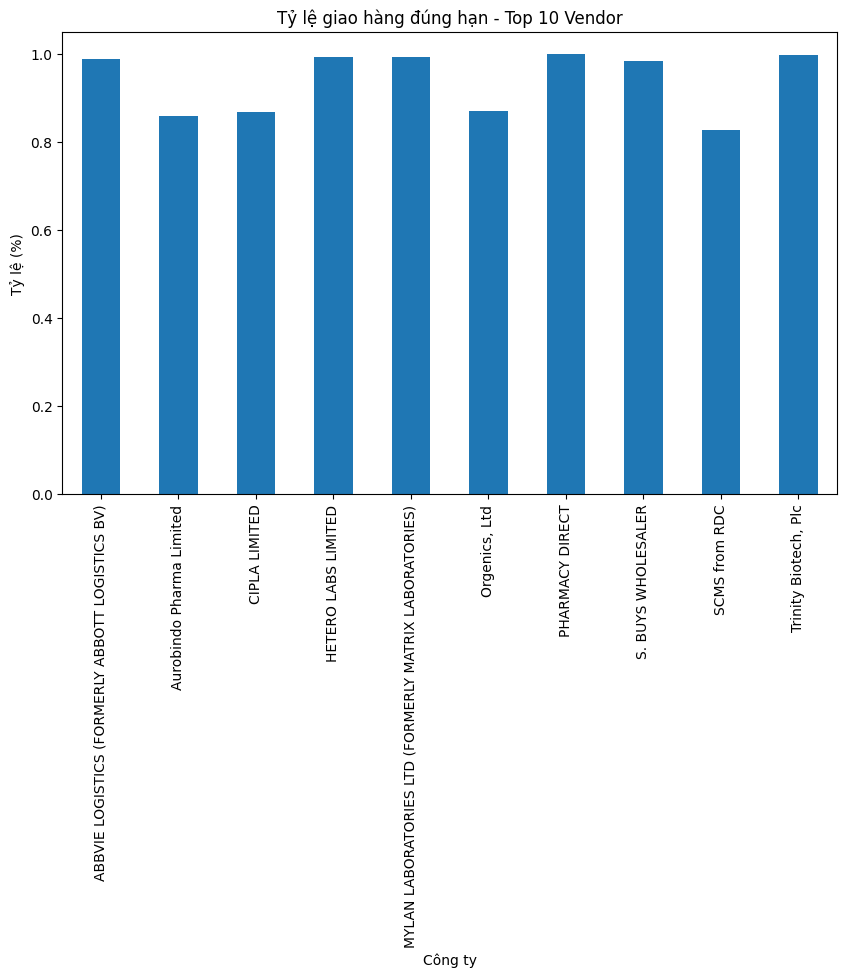

/tmp/ipython-input-2081418758.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='shipment_mode', y='on_time', estimator='mean', ci=None)


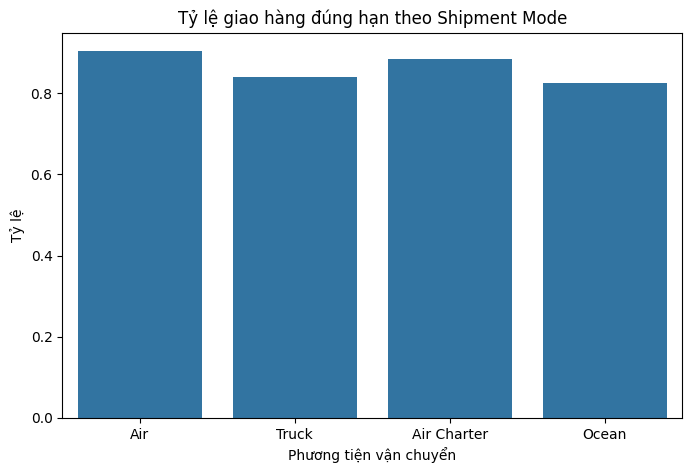

In [49]:
# On-time theo Top Vendor
ontime_vendor = df[df['vendor'].isin(top_vendors)].groupby('vendor')['on_time'].mean()

plt.figure(figsize=(10, 6))
ontime_vendor.plot(kind='bar')
plt.title('Tỷ lệ giao hàng đúng hạn - Top 10 Vendor')
plt.ylabel('Tỷ lệ (%)')
plt.xlabel('Công ty')
plt.savefig("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/Images/On-time Delivery_Analysis_by_Vendor.png", dpi=300, bbox_inches="tight")
plt.show()

# On-time theo Shipment Mode
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='shipment_mode', y='on_time', estimator='mean', ci=None)
plt.title('Tỷ lệ giao hàng đúng hạn theo Shipment Mode')
plt.ylabel('Tỷ lệ')
plt.xlabel('Phương tiện vận chuyển')


plt.savefig("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/Images/On-time Delivery_Analysis_by_Shipmode.png", dpi=300, bbox_inches="tight")
plt.show()

**On-time delivery rate**  
The on-time rate shows consistent room for improvement.

Trucking achieves relatively higher reliability than air and ocean.

Certain vendors and regions report frequent delays, suggesting weak points in planning or execution.

Improvements in scheduling and coordination could raise overall service levels.

## 2.4 Freight Cost Analysis

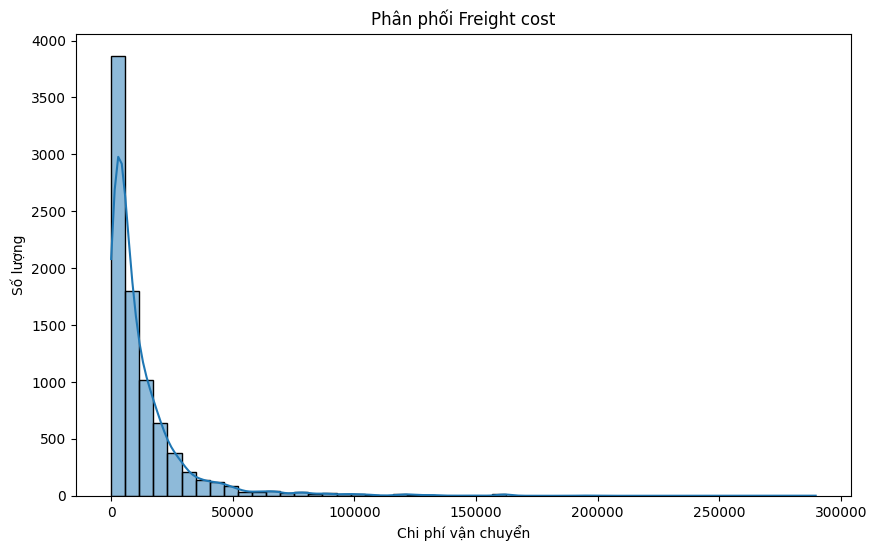

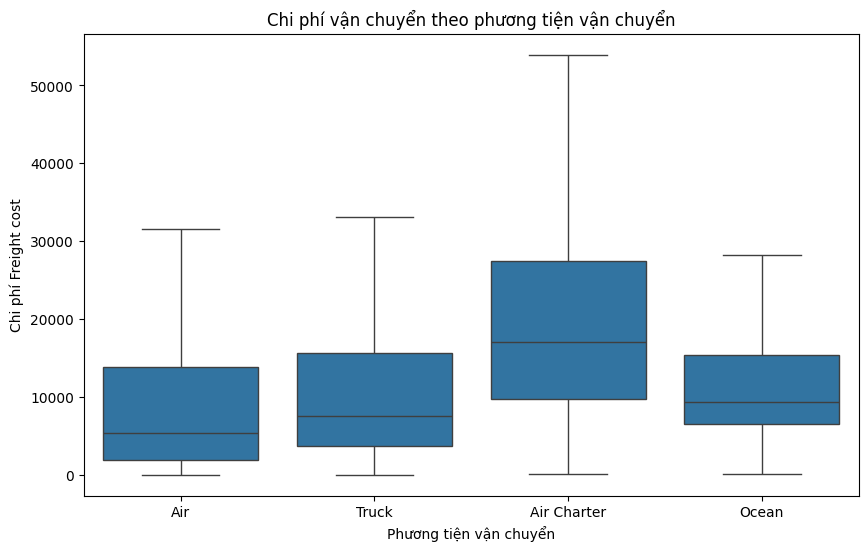

In [50]:
# Tổng quan chi phí
plt.figure(figsize=(10,6))
sns.histplot(df['freight_cost_(usd)_value'], bins=50, kde=True)
plt.title('Phân phối Freight cost')
plt.ylabel('Số lượng')
plt.xlabel('Chi phí vận chuyển')
plt.savefig("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/Images/Freight_Cost_Analysis_Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# Chi phí theo Shipment Mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='shipment_mode', y='freight_cost_(usd)_value', data=df, showfliers=False)
plt.title('Chi phí vận chuyển theo phương tiện vận chuyển')
plt.xlabel('Phương tiện vận chuyển')
plt.ylabel('Chi phí Freight cost')

plt.savefig("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/Images/Freight_Cost_Analysis_by Shipmode.png", dpi=300, bbox_inches="tight")
plt.show()


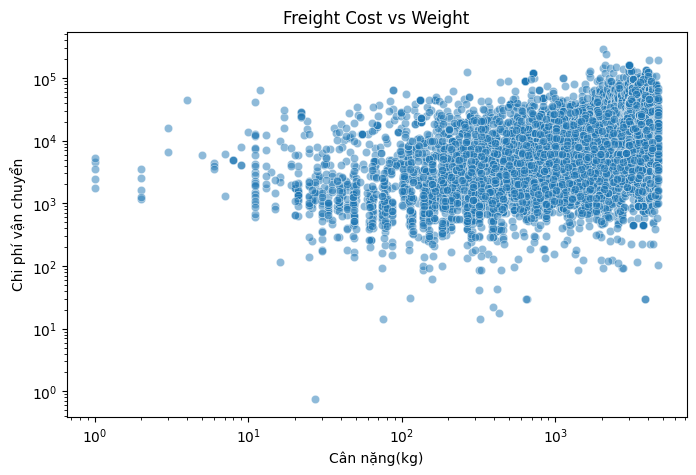

In [51]:
# Mối quan hệ với Weight
plt.figure(figsize=(8,5))
sns.scatterplot(x="weight_(kilograms)", y="freight_cost_(usd)_value", data=df, alpha=0.5)
plt.title("Freight Cost vs Weight")
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Chi phí vận chuyển')
plt.xlabel('Cân nặng(kg)')

plt.savefig("/content/ggdrive/MyDrive/Data Analysis Course/Project MD03/Images/Freight_Cost_Relations.png", dpi=300, bbox_inches="tight")
plt.show()

**Freight Cost per Kilogram**  
Costs differ sharply across modes:

*   Air and Air Charter are most expensive per kg.
*   Trucking is the lowest-cost option.
*   Ocean lies in the middle, suited for heavy but less urgent cargo.

#**Conclusion & Recommendations**

This analysis confirms clear trade-offs between volume, cost, and timeliness:


*   Air freight ensures speed but comes with high costs; best reserved for critical shipments.
*   Trucking is cost-efficient and should be maximized for non-urgent and domestic deliveries.
*   Air Charter is disproportionately expensive and should remain an emergency option.
*   Ocean freight could be used more for bulk, low-priority orders to reduce costs

---

Recommendations:


1.   Rebalance orders between Air and Truck to cut costs without hurting service quality.
2.   Improve on-time performance through better vendor coordination and scheduling.


3.   Investigate regional bottlenecks that cause persistent delays or higher costs.
4.   Explore greater use of Ocean freight for large shipments where time is less critical.
